# Graded Lab Assignment 2: Evaluate classifiers (10 points)
 
In this assignment you will optimize and compare the perfomance of a parametric (logistic regression) and non-parametric (k-nearest neighbours) classifier on the MNIST dataset.

Publish your notebook (ipynb file) to your Machine Learning repository on Github ON TIME. We will check the last commit on the day of the deadline.  

### Deadline Friday, November 17, 23:59.

This notebook consists of three parts: design, implementation, results & analysis. 
We provide you with the design of the experiment and you have to implement it and analyse the results.

### Criteria used for grading
* Explain and analyse all results.
* Make your notebook easy to read. When you are finished take your time to review it!
* You do not want to repeat the same chunks of code multiply times. If your need to do so, write a function. 
* The implementation part of this assignment needs careful design before you start coding. You could start by writing pseudocode.
* In this exercise the insights are important. Do not hide them somewhere in the comments in the implementation, but put them in the Analysis part
* Take care that all the figures and tables are well labeled and numbered so that you can easily refer to them.
* A plot should have a title and axes labels.
* You may find that not everything is 100% specified in this assignment. That is correct! Like in real life you probably have to make some choices. Motivate your choices.


### Grading points distribution

* Implementation 5 points
* Results and analysis 5 points

## Design of the experiment

You do not have to keep the order of this design and are allowed to alter it if you are confident.
* Import all necessary modules. Try to use as much of the available functions as possible. 
* Use the provided train and test set of MNIST dataset.
* Pre-process data eg. normalize/standardize, reformat, etc.           
  Do whatever you think is necessary and motivate your choices.
* (1) Train logistic regression and k-nn using default settings.
* Use 10-fold cross validation for each classifier to optimize the performance for one parameter: 
    * consult the documentation on how cross validation works in sklearn (important functions:             cross_val_score(), GridSearchCV()).
    * Optimize k for k-nn,
    * for logistic regression focus on the regularization parameter,
* (2) Train logistic regression and k-nn using optimized parameters.
* Show performance on the cross-validation set for (1) and (2) for both classifiers: 
    * report the average cross validation error rates (alternatively, the average accuracies - it's up to you) and standard deviation,
    * plot the average cross valildation errors (or accuracies) for different values of the parameter that you tuned. 
* Compare performance on the test set for two classifiers:
    * produce the classification report for both classifiers, consisting of precision, recall, f1-score. Explain and analyse the results.
    * print confusion matrix for both classifiers and compare whether they missclassify the same  classes. Explain and analyse the results.
* Discuss your results.
* BONUS: only continue with this part if you are confident that your implemention is complete 
    * tune more parameters of logistic regression
    * add additional classifiers (NN, Naive Bayes, decision tree), 
    * analyse additional dataset (ex. Iris dataset)

## Implementation of the experiment

LOGISTIC REGRESSION:
Mean CV score for c = 0.01: 0.9515055581180878
Mean CV score for c = 0.03: 0.9515145768700769
Mean CV score for c = 0.1: 0.9528474263020612
Mean CV score for c = 0.3: 0.9455486086698974
Mean CV score for c = 0.5: 0.9435213348207057
Mean CV score for c = 1: 0.9428419347075195
Mean CV score for c = 3: 0.9408908129940696
Mean CV score for c = 5: 0.9402091220233819
Mean CV score for c = 10: 0.9382305100455823
NEAREST NEIGHBOR:
average CV score for k = 1: 0.9782262583333683
average CV score for k = 2: 0.9735544556751305
average CV score for k = 3: 0.9748446332480001
average CV score for k = 4: 0.9682561812378208
average CV score for k = 5: 0.969568068456703
average CV score for k = 6: 0.9688875519608914
average CV score for k = 7: 0.9675662891857945
average CV score for k = 8: 0.9649161092580446
average CV score for k = 9: 0.9636137742114134
average CV score for k = 10: 0.9642848546878631


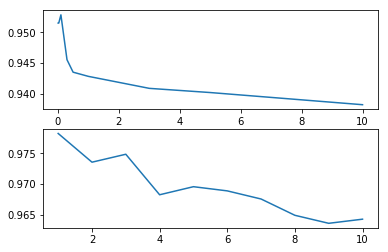

In [135]:
#### %pylab inline
from sklearn.datasets import load_digits
from sklearn import datasets # to load the dataset
from sklearn import metrics
from sklearn.preprocessing import StandardScaler # to normalize data (NN is very sensitive to this!)
from sklearn.model_selection import train_test_split #to split in train and test set
from sklearn.linear_model import LogisticRegression #logistic regression classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier # neural network classifier
from sklearn.model_selection import cross_val_score #BONUS: to tune parameters using cross-validation
import matplotlib.pyplot as plt


# load mnist dataset and split in train and test set.
digits = load_digits()
X_train_mnist = reshape(digits.images[:1500],(1500,64))
X_test_mnist = reshape(digits.images[1500:],(297,64))
y_train_mnist = digits.target[:1500]
y_test_mnist = digits.target[1500:]

plt.figure(1)

# your implementation here

# c = [0.001, 0.005, 0.01, 0.02, 0.03, 0.1, 0.3, 0.5, 1, 3, 5, 10, 100, 1000]

def logRegr():
    
    c = [0.01, 0.03, 0.1, 0.3, 0.5, 1, 3, 5, 10]
    scoresArr = []
    print('LOGISTIC REGRESSION:')
    for reg in c:
        # fit a logistic regression model to the data
        model = LogisticRegression(C=reg)
        model.fit(X_train_mnist, y_train_mnist)
        #print(model)
        #make predictions
        expected = y_test_mnist
        predicted = model.predict(X_test_mnist)
        #summarize the fit of the model
        print(metrics.accuracy_score(expected, predicted))
        
        cv
        scores = cross_val_score(model, X_train_mnist, y_train_mnist, cv=10)
        scoresArr.append(scores.mean())
        print('Mean CV score for c = {}: {}'.format(reg, scores.mean()))
        #print(metrics.confusion_matrix(expected, predicted))
    plt.subplot(211)
    plt.plot(c, scoresArr)
    
    
def kNearest():
    
    scaler = StandardScaler()
    XTransformTrain = scaler.fit_transform(X_train_mnist, y_train_mnist)
    XTransformTest = scaler.fit_transform(X_test_mnist, y_test_mnist)
    
    kArr = [1,2,3,4,5,6,7,8,9,10]
    scoresArrK = []
    print('NEAREST NEIGHBOR:')

    for k in kArr:
        # fit a k-nearest neighbor model to the data
        kn = KNeighborsClassifier(n_neighbors=k)
        kn.fit(XTransformTrain, y_train_mnist)
        # make predictions
        expected = y_test_mnist
        predicted = kn.predict(XTransformTest)
        #print(metrics.accuracy_score(expected, predicted))
        scores = cross_val_score(kn, X_train_mnist, y_train_mnist, cv=10)
        scoresArrK.append(scores.mean())
        print('average CV score for k = {}: {}'.format(k, scores.mean()))
    plt.subplot(212)
    plt.plot(kArr, scoresArrK)
    

    
logRegr()
kNearest()

#BONUS




## Results and analysis of the experiment

### 1. The dataset
The data I am working on is a MNIST dataset, which consists of 1500 digitized samples of handwritten digits from 0 to 9. Each digit is denoted as an array of 64 digits that translate to brightness of pixels. Bright pixels define the contour of a number - therefore, the brighter the pixel, the higher the chance that it is within the range of a given number.

### 2. Classifiers
#### 2.1 Logistic Regression
#### 2.2 k-Nearest Neighbor

### 3. Cross-Validation 
#### 3.1 Logistic Regression
#### 3.2 k-Nearest Neighbor

### 4. Performance
#### 3.1 Logistic Regression
#### 3.2 k-Nearest Neighbor


